In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("/content/Tesla.csv - Tesla.csv.csv")

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [23]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [24]:
print(df.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [25]:
df.fillna(method='ffill', inplace=True)


<ipython-input-25-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [26]:
df.dropna(inplace=True)


In [27]:
from scipy.stats import zscore

In [28]:
z_scores = np.abs(zscore(df[['Open','High',	'Low',	'Close',	'Adj Close',	'Volume']]))
threshold = 3
outlier_mask = (z_scores < threshold).all(axis=1)

In [29]:
print(outlier_mask)

0       False
1       False
2        True
3        True
4        True
        ...  
1687     True
1688     True
1689     True
1690     True
1691     True
Length: 1692, dtype: bool


In [30]:
outliers_count = (~outlier_mask).sum()
print(f'Number of outliers: {outliers_count}')


Number of outliers: 34


In [31]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
outliers = df[numerical_cols].apply(lambda x: (x < lower_bound[x.name]) | (x > upper_bound[x.name]), axis=0)
median_value = df[numerical_cols].median()
df[numerical_cols] = df[numerical_cols].mask(outliers, median_value, axis=1)

print(df.head())

        Date       Open   High        Low      Close   Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  3180700  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  3180700  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999  8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001  5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001  6866900  16.110001


In [34]:
z_scores = np.abs(zscore(df[['Open','High',	'Low',	'Close',	'Adj Close',	'Volume']]))
threshold = 3
outlier_mask = (z_scores < threshold).all(axis=1)

In [35]:
print(outlier_mask)

0       True
1       True
2       True
3       True
4       True
        ... 
1687    True
1688    True
1689    True
1690    True
1691    True
Length: 1692, dtype: bool


In [39]:
outliers_count = (outlier_mask)
print(f'Number of outliers: {outliers_count}')


Number of outliers: 0       True
1       True
2       True
3       True
4       True
        ... 
1687    True
1688    True
1689    True
1690    True
1691    True
Length: 1692, dtype: bool


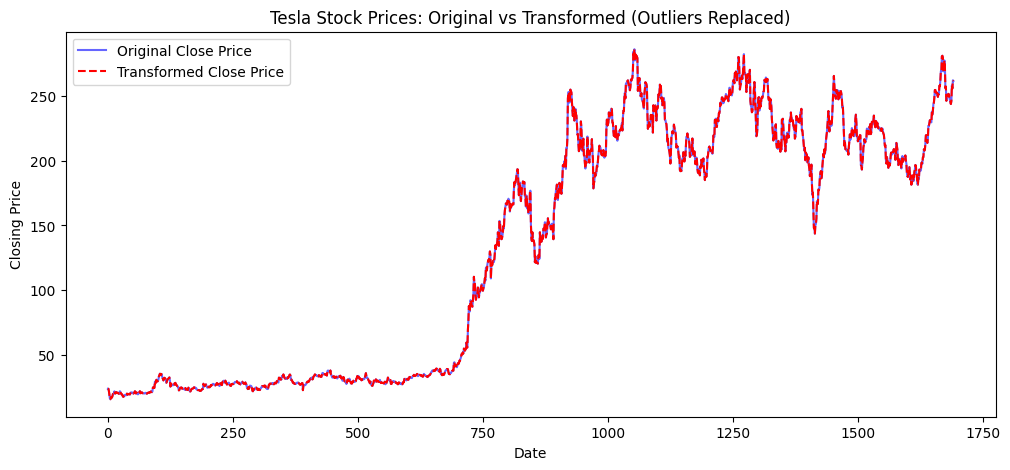

In [40]:
import matplotlib.pyplot as plt

df_transformed = df.copy()
df_transformed[numerical_cols] = np.where(outliers, df[numerical_cols].median(), df[numerical_cols])

# Plot Original vs Transformed Closing Prices
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], label="Original Close Price", color="blue", alpha=0.6)
plt.plot(df_transformed.index, df_transformed["Close"], label="Transformed Close Price", color="red", linestyle="dashed")
plt.title("Tesla Stock Prices: Original vs Transformed (Outliers Replaced)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()
